In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tkinter

plt.style.use('ggplot')
from tqdm import tqdm

In [2]:
df = pd.read_csv(r'C:\Users\Hp\Downloads\z connect app.csv')
print(df.shape)##For analysing no of rows and column
df = df.head(2235)
print(df.shape)

(2235, 10)
(2235, 10)


In [3]:
df.head()

,ID,Customer Name,Review Date,Review Responded Date,Review,Review Responded,Rating,Review Type,Work Log Remarks,Platform
0,1,roshith ravi,1-Dec-22,6-Dec-22,I had renewed my subscription 2 months back bu...,"Dear roshith ravi, Greetings to you from Tata ...",2,Negative,Email not yet received,Android
1,2,chandresh mehta,1-Dec-22,6-Dec-22,Still not connecting,"Dear chandresh mehta, we are sorry to hear abo...",1,Negative,Email not yet received,Android
2,3,Satish Chavan,1-Dec-22,6-Dec-22,I was Facing issue to load battry utilization ...,"Dear Sir, Greetings to you from Tata Motors. Y...",1,Negative,Email not yet received,Android
3,4,Krishna Prasanth,1-Dec-22,6-Dec-22,Need a lot of improvements,"Dear Krishna Prasanth, thank you for taking th...",3,Average,Email not yet received,Android
4,5,Amarpal Singh Bansal,2-Dec-22,6-Dec-22,V poor vehicle quality,"Dear Amarpal Singh Bansal, we are sorry to hea...",1,Negative,Email not yet received,Android


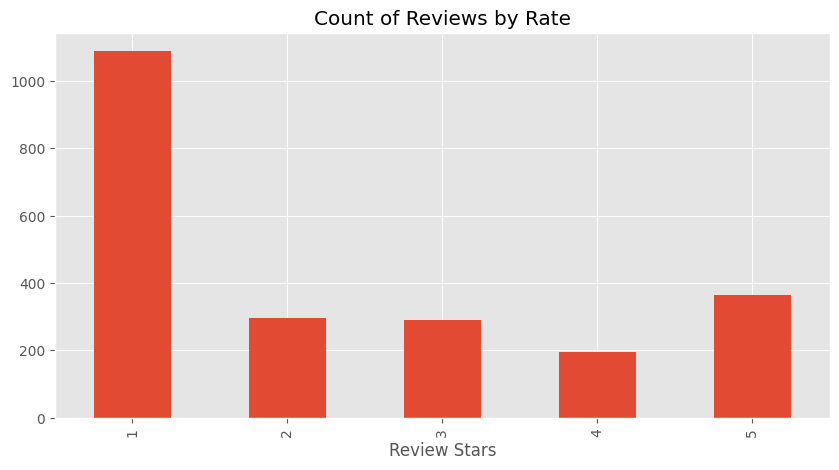

In [4]:
from matplotlib import axes


df['Rating'].value_counts().sort_index() \
        .plot(kind='bar' ,
            title='Count of Reviews by Rate' ,
            figsize=(10,5))
plt.xlabel('Review Stars')
plt.show()

In [5]:
example =df['Review'][50]
print(example)

The app is very good and if the driver follows the app he would know his driving style and correct the same to get the best mileage. I am loving it! I can't imagine driving my EV without this! Request you to update the new charging stations installed regularly for the benifit of users.


In [6]:
import nltk
tokens = nltk.word_tokenize(example)
tokens[:10]#slicing the 1st 10 elements


['The', 'app', 'is', 'very', 'good', 'and', 'if', 'the', 'driver', 'follows']

In [7]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('The', 'DT'),
 ('app', 'NN'),
 ('is', 'VBZ'),
 ('very', 'RB'),
 ('good', 'JJ'),
 ('and', 'CC'),
 ('if', 'IN'),
 ('the', 'DT'),
 ('driver', 'NN'),
 ('follows', 'VBZ')]

In [8]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()


(S
  The/DT
  app/NN
  is/VBZ
  very/RB
  good/JJ
  and/CC
  if/IN
  the/DT
  driver/NN
  follows/VBZ
  the/DT
  app/NN
  he/PRP
  would/MD
  know/VB
  his/PRP$
  driving/VBG
  style/NN
  and/CC
  correct/VBP
  the/DT
  same/JJ
  to/TO
  get/VB
  the/DT
  best/JJS
  mileage/NN
  ./.
  I/PRP
  am/VBP
  loving/VBG
  it/PRP
  !/.
  I/PRP
  ca/MD
  n't/RB
  imagine/VB
  driving/VBG
  my/PRP$
  EV/NN
  without/IN
  this/DT
  !/.
  Request/NNP
  you/PRP
  to/TO
  update/VB
  the/DT
  new/JJ
  charging/VBG
  stations/NNS
  installed/VBD
  regularly/RB
  for/IN
  the/DT
  benifit/NN
  of/IN
  users/NNS
  ./.)


In [9]:
from nltk.sentiment import SentimentIntensityAnalyzer##pretrained model to find pos,neg,neu
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()
scores = sia.polarity_scores(example)
print(scores)

{'neg': 0.0, 'neu': 0.805, 'pos': 0.195, 'compound': 0.9166}


In [10]:
# Run the polarity score on entire dataset
res={}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Review']
    myid = row['ID']
    res[myid] = sia.polarity_scores(text)
    

  0%|          | 0/2235 [00:00<?, ?it/s]

In [11]:
res

{1: {'neg': 0.154, 'neu': 0.679, 'pos': 0.167, 'compound': 0.1283},
 2: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 3: {'neg': 0.102, 'neu': 0.898, 'pos': 0.0, 'compound': -0.5256},
 4: {'neg': 0.0, 'neu': 0.566, 'pos': 0.434, 'compound': 0.3182},
 5: {'neg': 0.608, 'neu': 0.392, 'pos': 0.0, 'compound': -0.4767},
 6: {'neg': 0.0, 'neu': 0.868, 'pos': 0.132, 'compound': 0.4404},
 7: {'neg': 0.0, 'neu': 0.615, 'pos': 0.385, 'compound': 0.3612},
 8: {'neg': 0.0, 'neu': 0.256, 'pos': 0.744, 'compound': 0.4404},
 9: {'neg': 0.0, 'neu': 0.196, 'pos': 0.804, 'compound': 0.6249},
 10: {'neg': 0.404, 'neu': 0.596, 'pos': 0.0, 'compound': -0.2584},
 11: {'neg': 0.111, 'neu': 0.889, 'pos': 0.0, 'compound': -0.3612},
 12: {'neg': 0.0, 'neu': 0.554, 'pos': 0.446, 'compound': 0.936},
 13: {'neg': 0.075, 'neu': 0.925, 'pos': 0.0, 'compound': -0.296},
 14: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 15: {'neg': 0.0, 'neu': 0.873, 'pos': 0.127, 'compound': 0.4404},
 16: {'neg': 

In [40]:
vaders = pd.DataFrame(res).T#tarnsposes the dataframe where roe to specific id and coloumn to a sentimental score
vaders = vaders.reset_index().rename(columns={'index': 'ID'})
vaders = vaders.merge(df, how='left')


In [39]:
vaders.head()

,ID,neg,neu,pos,compound,Customer Name,Review Date,Review Responded Date,Review,Review Responded,Rating,Review Type,Work Log Remarks,Platform
0,1,0.154,0.679,0.167,0.1283,roshith ravi,1-Dec-22,6-Dec-22,I had renewed my subscription 2 months back bu...,"Dear roshith ravi, Greetings to you from Tata ...",2,Negative,Email not yet received,Android
1,2,0.000,1.000,0.000,0.0000,chandresh mehta,1-Dec-22,6-Dec-22,Still not connecting,"Dear chandresh mehta, we are sorry to hear abo...",1,Negative,Email not yet received,Android
2,3,0.102,0.898,0.000,-0.5256,Satish Chavan,1-Dec-22,6-Dec-22,I was Facing issue to load battry utilization ...,"Dear Sir, Greetings to you from Tata Motors. Y...",1,Negative,Email not yet received,Android
3,4,0.000,0.566,0.434,0.3182,Krishna Prasanth,1-Dec-22,6-Dec-22,Need a lot of improvements,"Dear Krishna Prasanth, thank you for taking th...",3,Average,Email not yet received,Android
4,5,0.608,0.392,0.000,-0.4767,Amarpal Singh Bansal,2-Dec-22,6-Dec-22,V poor vehicle quality,"Dear Amarpal Singh Bansal, we are sorry to hea...",1,Negative,Email not yet received,Android


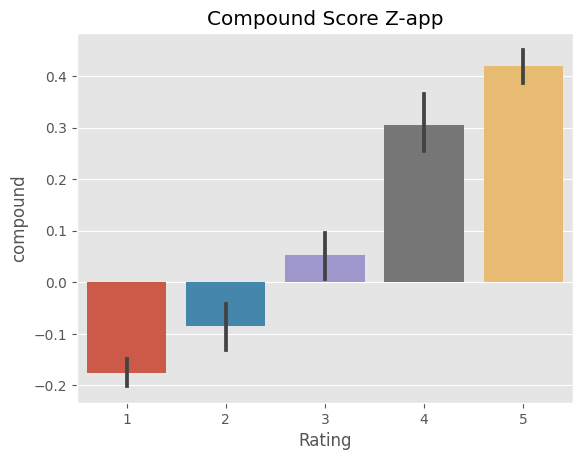

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(data=vaders, x='Rating', y='compound')
plt.title('Compound Score Z-app')
plt.show()

 VADER (Valence Aware Dictionary and sEntiment Reasoner)

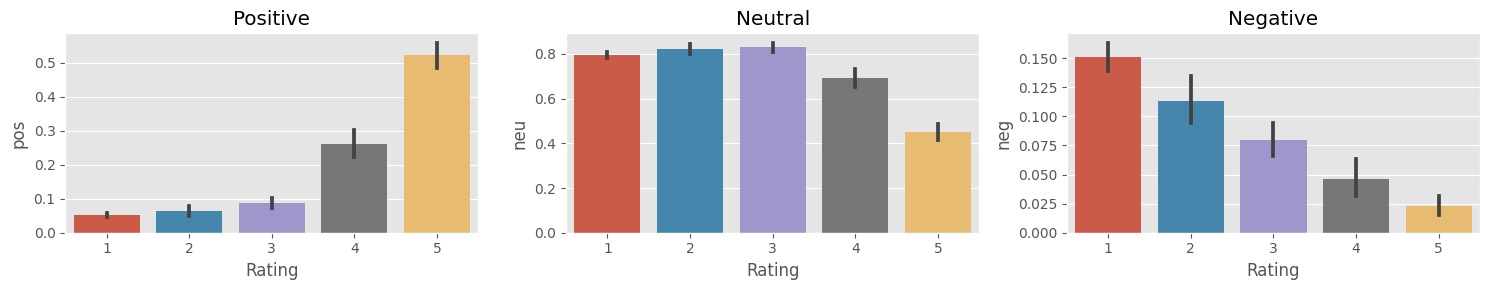

In [15]:
fig, axs = plt.subplots(1, 3, figsize=(15, 3))
sns.barplot(data=vaders, x='Rating', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Rating', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Rating', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()


In [16]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax#used to normalize a set of numerical values into a probability distribution

In [19]:
# pipeline for a high-level helper
from transformers import pipeline

pipe = pipeline("text-classification", model="cardiffnlp/twitter-roberta-base-sentiment")# function provides a high-level interface to interact with pre-trained models for various NLP tasks

In [20]:
# Load model directly
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment")
model = AutoModelForSequenceClassification.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment")

In [25]:
print(example)
sia.polarity_scores(example)

The app is very good and if the driver follows the app he would know his driving style and correct the same to get the best mileage. I am loving it! I can't imagine driving my EV without this! Request you to update the new charging stations installed regularly for the benifit of users.


{'neg': 0.0, 'neu': 0.805, 'pos': 0.195, 'compound': 0.9166}

In [27]:
import numpy as np

# Rest of your code...

scores_array = np.array(list(scores.values()), dtype=np.float32)  # Convert dictionary values to array
scores_array = np.exp(scores_array) / np.sum(np.exp(scores_array))

scores_dict = {
    'roberta_neg': scores_array[0],
    'roberta_neu': scores_array[1],
    'roberta_pos': scores_array[2]
}
print(scores_dict)


{'roberta_neg': 0.14382735, 'roberta_neu': 0.32169813, 'roberta_pos': 0.17479494}


In [28]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = softmax(scores)
    scores_dict = {
    'roberta_neg': scores_array[0],
    'roberta_neu': scores_array[1],
    'roberta_pos': scores_array[2]
}
print(scores_dict)

{'roberta_neg': 0.14382735, 'roberta_neu': 0.32169813, 'roberta_pos': 0.17479494}


In [29]:
# Run the polarity score on entire dataset
import numpy as np

# Rest of your code...

def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg': scores[0],
        'roberta_neu': scores[1],
        'roberta_pos': scores[2]
    }
    return scores_dict

    

In [30]:
res = {}
for index, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Review']
    myid = row['ID']
    vader_result = sia.polarity_scores(text)
    vader_result_rename = {}
    for key, value in vader_result.items():
        vader_result_rename[f"vader_{key}"] = value
    roberta_result = polarity_scores_roberta(text)
    both = {**vader_result_rename, **roberta_result}
    res[myid] = both


  0%|          | 0/2235 [00:00<?, ?it/s]

In [31]:
both

{'vader_neg': 0.117,
 'vader_neu': 0.691,
 'vader_pos': 0.191,
 'vader_compound': 0.4215,
 'roberta_neg': 0.5127564,
 'roberta_neu': 0.4396273,
 'roberta_pos': 0.04761631}

In [32]:
results_df = pd.DataFrame(res).T
results_df =results_df.reset_index().rename(columns={'index': 'ID'})
results_df = results_df.merge(df, how='left')


In [33]:
import pandas as pd

result_df = pd.DataFrame(res).T
result_df = results_df.reset_index().rename(columns={'index': 'Id'})
results_df =results_df.merge(df, how='left')

result_df.head()


,Id,ID,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,Customer Name,Review Date,Review Responded Date,Review,Review Responded,Rating,Review Type,Work Log Remarks,Platform
0,0,1,0.154,0.679,0.167,0.1283,0.969096,0.028265,0.002638,roshith ravi,1-Dec-22,6-Dec-22,I had renewed my subscription 2 months back bu...,"Dear roshith ravi, Greetings to you from Tata ...",2,Negative,Email not yet received,Android
1,1,2,0.000,1.000,0.000,0.0000,0.867211,0.125405,0.007384,chandresh mehta,1-Dec-22,6-Dec-22,Still not connecting,"Dear chandresh mehta, we are sorry to hear abo...",1,Negative,Email not yet received,Android
2,2,3,0.102,0.898,0.000,-0.5256,0.914606,0.077320,0.008073,Satish Chavan,1-Dec-22,6-Dec-22,I was Facing issue to load battry utilization ...,"Dear Sir, Greetings to you from Tata Motors. Y...",1,Negative,Email not yet received,Android
3,3,4,0.000,0.566,0.434,0.3182,0.220153,0.638541,0.141306,Krishna Prasanth,1-Dec-22,6-Dec-22,Need a lot of improvements,"Dear Krishna Prasanth, thank you for taking th...",3,Average,Email not yet received,Android
4,4,5,0.608,0.392,0.000,-0.4767,0.782289,0.202492,0.015219,Amarpal Singh Bansal,2-Dec-22,6-Dec-22,V poor vehicle quality,"Dear Amarpal Singh Bansal, we are sorry to hea...",1,Negative,Email not yet received,Android


#Compare Scores between models

In [34]:
results_df.columns

Index(['ID', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'Customer Name',
       'Review Date', 'Review Responded Date', 'Review', 'Review Responded',
       'Rating', 'Review Type', 'Work Log Remarks', 'Platform'],
      dtype='object')

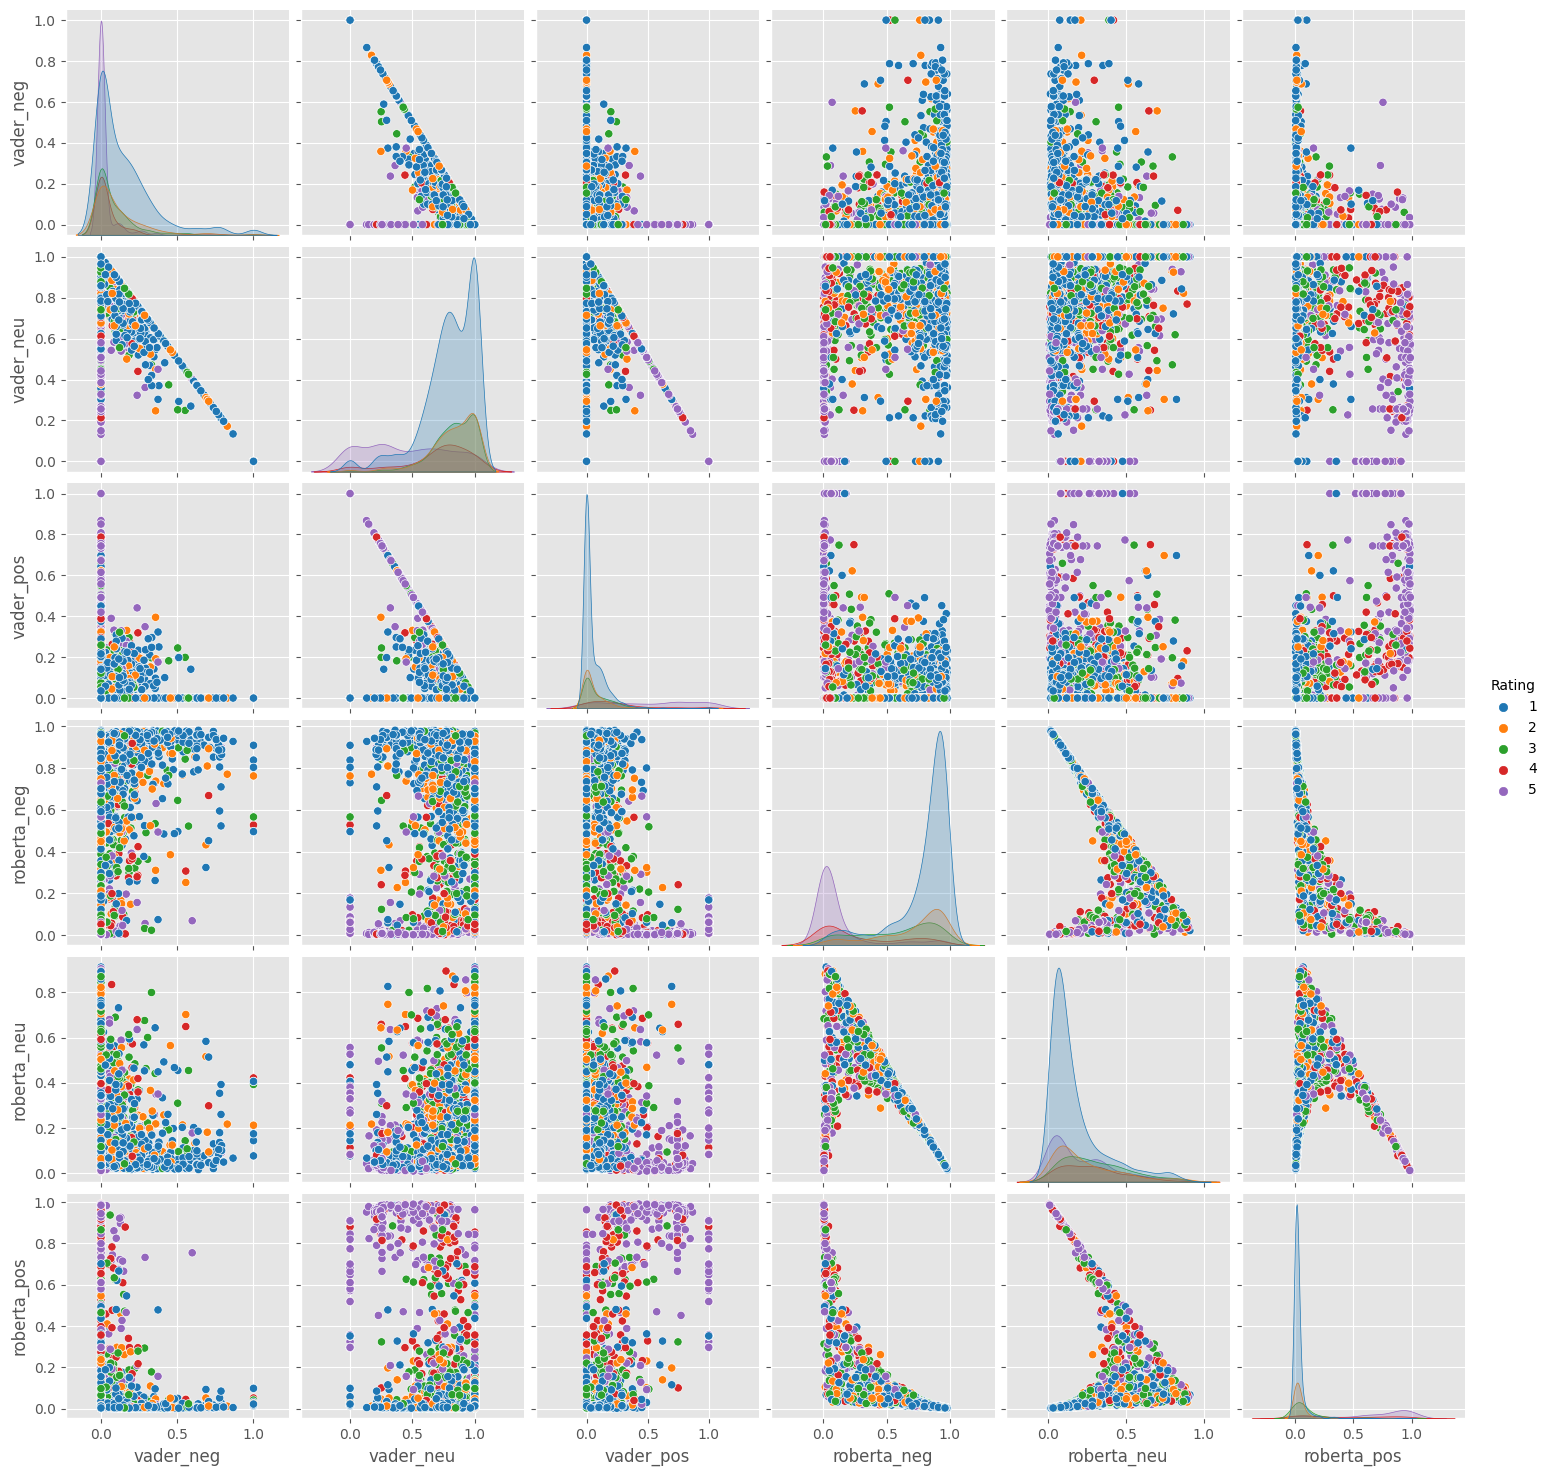

In [35]:
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                   'roberta_neg', 'roberta_neu', 'roberta_pos'],
             hue='Rating',
             palette='tab10')
plt.show()

In [36]:
results_df.query('Rating == 1')\
    .sort_values('roberta_pos', ascending=False)['Review'].values[0]


'Good app Thank you Tata'

In [39]:
results_df.query('Rating == 4')\
    .sort_values('roberta_neg', ascending=True)['Review'].values[0]

'Nice app . Needs more infor on real time EV charging near vehicle . Very proud of the TATA ecosystem and the app developed in India . Congratulations team ...!'

In [40]:
print(results_df.columns)

Index(['ID', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'Customer Name',
       'Review Date', 'Review Responded Date', 'Review', 'Review Responded',
       'Rating', 'Review Type', 'Work Log Remarks', 'Platform'],
      dtype='object')


In [13]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment")
model = AutoModelForSequenceClassification.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment")

# Example input text
text = "This is a positive sentence."

# Tokenize input text
inputs = tokenizer(text, return_tensors="pt")

# Pass the tokenized input through the model
outputs = model(**inputs)

# Get predicted sentiment label
predicted_label = tokenizer.decode(outputs.logits.argmax(dim=-1))

print("Predicted sentiment:", predicted_label)


Predicted sentiment: </s>


In [30]:
sent_pipeline('Does not sync easily')


[{'label': 'NEGATIVE', 'score': 0.999619722366333}]